<a href="https://colab.research.google.com/github/rajeshpahari/Deep-Learning/blob/main/Pytorch_Simple_Multilayer_ANN_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt


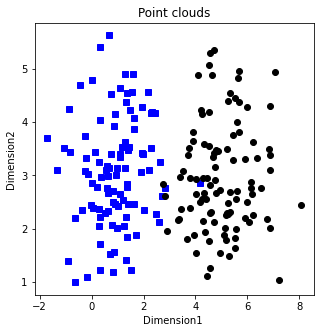

In [49]:
nPerClust=100
deviation=1

A=[1,3]
B=[5,3]

#Generate Data
a=[A[0]+np.random.randn(nPerClust)*deviation,A[1]+np.random.randn(nPerClust)*deviation]
b=[B[0]+np.random.randn(nPerClust)*deviation,B[1]+np.random.randn(nPerClust)*deviation]

#Target or labels-True
labels_np=np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1))))
data_np=np.hstack((a,b)).T
#Convert data into pytorch tensor
labels=torch.tensor(labels_np).float()
data=torch.tensor(data_np).float()


#show the data
fig=plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.title('Point clouds')
plt.xlabel('Dimension1 ')
plt.ylabel('Dimension2 ')
plt.show();


In [50]:
#[data[np.where(labels==0)][0],1]

In [51]:
from torch.nn.modules.loss import BCELoss
from torch.nn.modules.linear import Linear
#Function to Build and Train Model

def createANNmodel(learningRate):

  #Model Architechture
  ANNclassify= nn.Sequential(
      nn.Linear(2,16), #input size=2 , hidden Layer=16
      nn.ReLU(),#Nonlinear Activation function
      nn.Linear(16,1),#input size=no.of Hidden Layer=2 , output Layer=16
      nn.ReLU(),
      nn.Linear(1,1),#output unit ..input size=no.of Hidden Layer=1 , output Layer=1
      nn.Sigmoid()# final non-Linear Activation function
)
  
  #Loss Function
  lossfunc=BCELoss()#better to Use BCEWithLogitsloss function

  #Optimizer
  optimizer=torch.optim.SGD(ANNclassify.parameters(),lr=learningRate)

  #Model output
  return ANNclassify,lossfunc,optimizer




In [52]:
from torch.optim import optimizer
from matplotlib.figure import NonGuiException
#Function to train the Model

#fixed parameters
numepochs=1000

# Define training function

def trainModel(ANNmodel):
  #Initilize Losses
  losses=torch.zeros(numepochs)

  #Train Model
  for epochi in range(numepochs):
    
    
    #output of this epoch
    yHat=ANNmodel(data)
    
    #Compute Loss
    loss=lossfunc(yHat,labels)  #loss=(yHat-y)...labels is y here
    #Loss in this epoch
    losses[epochi]=loss

    #backpropagation to tune weights and biases
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


  #Final Fowrad Pass
  pred=ANNmodel(data)

  #compute the prediction accuracy
  totacc= 100*torch.mean(((pred>.5)==labels).float())

  return losses,pred,totacc





In [53]:
#test code
#numepochs=10
#range(numepochs)


#Test for one instance

Total Accuracy:  tensor(50.)


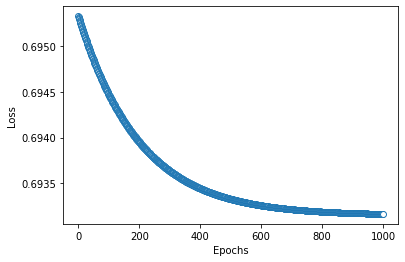

In [54]:
#Create Model with lr=.01
ANNclassify,lossfunc,optimizer=createANNmodel(.01)
#Train Model
losses,pred,totacc=trainModel(ANNclassify)

#report Accuracy
print('Total Accuracy: ',totacc)


#Show the Losses
plt.plot(losses.detach(),'o',markerfacecolor='w',lw=.2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Test with Varying learing rate

In [60]:
learnigRates=np.linspace(.0001,.1,50)

#Initalize accuracy & Loss
accByLR=[]
allLosses=np.zeros((len(learnigRates),numepochs))

#for Loop
for i,LR in enumerate (learnigRates):
  
  #Build and train the Model
  ANNclassify,lossfunc,optimizer=createANNmodel(LR)
  losses,pred,totacc=trainModel(ANNclassify)


  #Store the Results
  accByLR.append(totacc)
  allLosses[i,:]= losses.detach()  #store all losses in epoch i

  






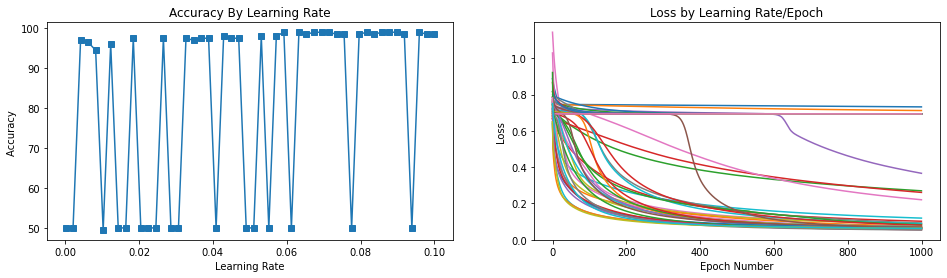

In [61]:
fig,ax=plt.subplots(1,2,figsize=(16,4))

ax[0].plot(learnigRates,accByLR,'s-')
ax[0].set_xlabel('Learning Rate')
ax[0].set_ylabel('Accuracy ')
ax[0].set_title('Accuracy By Learning Rate')

ax[1].plot(allLosses.T)
ax[1].set_xlabel('Epoch Number')
ax[1].set_ylabel('Loss ')
ax[1].set_title('Loss by Learning Rate/Epoch')

plt.show()


In [69]:
sum(torch.tensor(accByLR)>90)/len(accByLR)

tensor(0.6600)

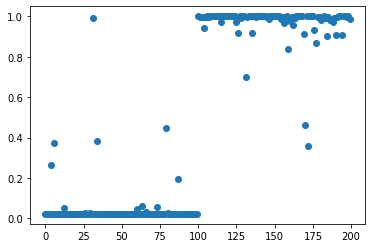

In [70]:
plt.plot(pred.detach(),'o')

In [57]:
# learnigRates=np.linspace(.001,.1,50)
# for i,LR in enumerate (learnigRates):
#   print(i,'   ',LR)